[IPython Notebook](minimal_overcontact.ipynb) |  [Python Script](minimal_overcontact.py)

Minimal Overcontact System
============================

Setup
-----------------------------

As always, let's do imports and initialize a logger and a new bundle.  See [Building a System](../tutorials/building_a_system.html) for more details.

In [1]:
%matplotlib inline

In [2]:
import phoebe
from phoebe import u # units
import numpy as np
import matplotlib.pyplot as plt

logger = phoebe.logger()

/usr/local/lib/python2.7/dist-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


Here we'll initialize a default binary, but ask for it to be created as an overcontact

In [3]:
b_oc = phoebe.default_binary(overcontact=True)

/usr/local/lib/python2.7/dist-packages/astropy/units/quantity.py:732: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  return super(Quantity, self).__eq__(other)


We'll compare this to the default detached binary

In [4]:
b_detached = phoebe.default_binary()

Hierarchy
-------------

Let's first look at the hierarchy of the default detached binary, and then compare that to the hierarchy of the overcontact system

In [5]:
print b_detached.hierarchy


    orbit:binary 
    
        star:primary 
        star:secondary
    



In [6]:
print b_oc.hierarchy


    orbit:binary 
    
        star:primary 
        star:secondary 
        envelope:common_envelope
    



As you can see, the overcontact system has an additional "component" with method "envelope" and component label "common_envelope".

Next let's look at the parameters in this envelope component

In [7]:
print b_oc.filter(component='common_envelope', kind='envelope', context='component')

ParameterSet: 7 parameters
  abun@common_envelope@component: 0.0
   pot@common_envelope@component: 3.5
  intens_coeff1@common_envelo...: 1.0
  intens_coeff2@common_envelo...: 1.0
  intens_coeff3@common_envelo...: 1.0
  intens_coeff4@common_envelo...: 1.0
  intens_coeff5@common_envelo...: 1.0


In [8]:
b_oc['pot@common_envelope'] = 3.5

In [9]:
b_oc['pot@common_envelope']

<Parameter: pot=3.5 | keys: description, value, quantity, default_unit, limits, visible_if, copy_for, timederiv>

The individual stars are still there, but since the surface is being defined by the common envelope, most of the parameters are no longer relevant.

In [10]:
print b_oc.filter(component='primary', kind='star', context='component')

ParameterSet: 8 parameters
          teff@primary@component: 10000.0 K
     gravb_bol@primary@component: 1.0
  frac_refl_bol@primary@compo...: 0.6
* frac_lost_bol@primary@compo...: 0.4
   ld_func_bol@primary@component: logarithmic
  ld_coeffs_bol@primary@compo...: [ 0.5  0.5]
*         mass@primary@component: 0.381666540188 solMass
*          sma@primary@component: 4.0 solRad


Now, of course, if we didn't originally know we wanted an overcontact system and built the default detached system, we could still turn it into an overcontact system just by changing the hierarchy.

In [11]:
b_detached.add_component('envelope', component='common_envelope')

<ParameterSet: 7 parameters | qualifiers: abun, pot, intens_coeff1, intens_coeff2, intens_coeff3, intens_coeff4, intens_coeff5>

In [12]:
hier = phoebe.hierarchy.binaryorbit(b_detached['binary'], b_detached['primary'], b_detached['secondary'], b_detached['common_envelope'])
print hier

orbit:binary(star:primary, star:secondary, envelope:common_envelope)


In [13]:
b_detached.set_hierarchy(hier)

In [14]:
print b_detached.hierarchy


    orbit:binary 
    
        star:primary 
        star:secondary 
        envelope:common_envelope
    



Likewise, we can make an overcontact system detached again simply by removing the envelope from the hierarchy.  The parameters themselves will still exist (unless you remove them), so you can always just change the hierarchy again to change back to an overcontact system.

In [15]:
hier = phoebe.hierarchy.binaryorbit(b_detached['binary'], b_detached['primary'], b_detached['secondary'])
print hier

orbit:binary(star:primary, star:secondary)


In [16]:
b_detached.set_hierarchy(hier)

In [17]:
print b_detached.hierarchy


    orbit:binary 
    
        star:primary 
        star:secondary
    



Adding Datasets
---------------------

In [18]:
b_oc.add_dataset('mesh', times=[0], dataset='mesh01')

<ParameterSet: 1 parameters>

In [19]:
b_oc.add_dataset('orb', times=np.linspace(0,3,201), dataset='orb01')

<ParameterSet: 2 parameters | components: primary, secondary>

For comparison, we'll do the same to our detached system

In [20]:
b_detached.add_dataset('mesh', times=[0], dataset='mesh01')

<ParameterSet: 1 parameters>

In [21]:
b_detached.add_dataset('orb', times=np.linspace(0,3,201), dataset='orb01')

<ParameterSet: 2 parameters | components: primary, secondary>

Running Compute
--------------------

In [22]:
b_oc.run_compute()

-2.35571056252e-15 -5.08200219656e-15
-1.81223287333e-16 -4.09082435455e-16


<ParameterSet: 45 parameters | kinds: mesh, orb>

In [23]:
b_detached.run_compute()

<ParameterSet: 76 parameters | kinds: mesh, orb>

Synthetics
------------------

The synthetic meshes for our overcontact system are attached to the envelope component, whereas the detached system are attached to the two star components

In [24]:
print b_oc['mesh01@model'].components

['common_envelope']


In [25]:
print b_detached['mesh01@model'].components

['primary', 'secondary']


But dynamical quantities are still attached for each star component - regardless of whether they're in a detached or overcontact system

In [26]:
print b_oc['orb01@model'].components

['primary', 'secondary']


In [27]:
print b_detached['orb01@model'].components

['primary', 'secondary']


Plotting
---------------

### Meshes

/usr/local/lib/python2.7/dist-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


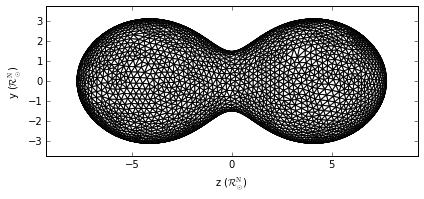

In [32]:
axs, artists = b_oc['mesh01@model'].plot(x='zs')

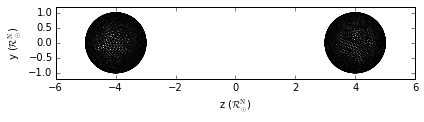

In [33]:
axs, artists = b_detached['mesh01@model'].plot(x='zs')

### Orbits

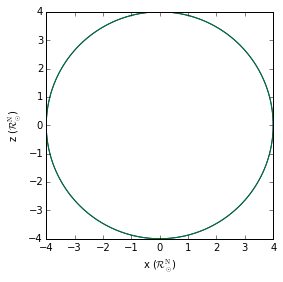

In [30]:
axs, artists = b_oc['orb01@model'].plot()

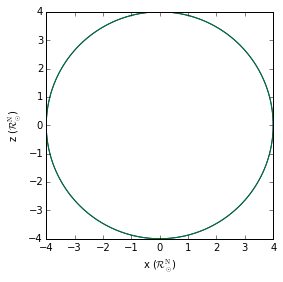

In [31]:
axs, artists = b_detached['orb01@model'].plot()